Notebook to try out some neural network stuff.

# Load standard libraries

In [1]:
import sys
sys.path.insert(1, './src')
import time
import matplotlib.pyplot as plt

# Load my codes

In [2]:
import mnist_loader
import nn

# Load the data

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# Varying number of hidden units

In [7]:
net30 = nn.NN()
net30.set_layers([784, 30, 10])
net30.init_weights_and_biases()

In [8]:
progress30 = net30.SGD(training_data, 30, 10, 3.0, test_data)
net30.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


In [27]:
net100 = nn.NN()
net100.set_layers([784, 100, 10])
net100.init_weights_and_biases()
progress100 = net100.SGD(training_data, 30, 10, 3.0, test_data)
net100.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9494

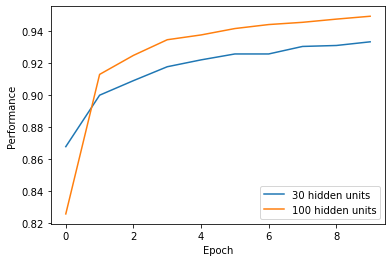

In [28]:
fig, ax = plt.subplots()
ax.plot(progress30, label='30 hidden units')
ax.plot(progress100, label='100 hidden units')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

The above seems to suggest that more hidden units produce better results (which is what would be expected). However, it varies a lot between runs. The explanation is probably that it depends a lot on the (random) weight initialisation. Also, with more parameters, there is a higher risk of overfitting.

Now let us try to add another layer, both with 30 neurons. This should add a lot (30x30) of extra parameters.

In [32]:
net3030 = nn.NN()
net3030.set_layers([784, 30, 30, 10])
net3030.init_weights_and_biases()
progress3030 = net3030.SGD(training_data, 30, 10, 3.0, test_data)
net3030.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9367

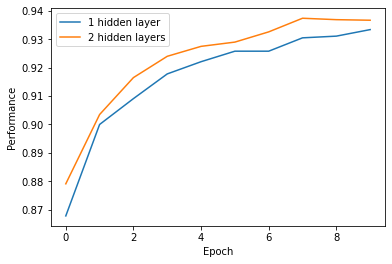

In [33]:
fig, ax = plt.subplots()
ax.plot(progress30, label='1 hidden layer')
ax.plot(progress3030, label='2 hidden layers')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

There seems to be some improvement and it seems to be somewhat consistent over a number of tries.

# Varying learning rate

Take 30 units in the hidden layer and vary the learning rate.

In [34]:
net2 = nn.NN()
net2.set_layers([784, 30, 10])
net2.init_weights_and_biases()
progress2 = net2.SGD(training_data, 30, 10, 0.1, test_data)
net2.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


8004

In [35]:
net3 = nn.NN()
net3.set_layers([784, 30, 10])
net3.init_weights_and_biases()
progress3 = net3.SGD(training_data, 30, 10, 0.01, test_data)
net3.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


2701

In [36]:
net4 = nn.NN()
net4.set_layers([784, 30, 10])
net4.init_weights_and_biases()
progress4 = net4.SGD(training_data, 30, 10, 1.0, test_data)
net4.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9184

In [38]:
net5 = nn.NN()
net5.set_layers([784, 30, 10])
net5.init_weights_and_biases()
progress5 = net5.SGD(training_data, 30, 10, 5.0, test_data)
net5.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


8495

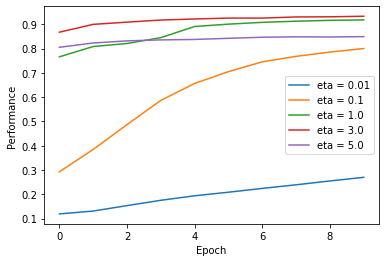

In [39]:
fig, ax = plt.subplots()
ax.plot(progress3, label='eta = 0.01')
ax.plot(progress2, label='eta = 0.1')
ax.plot(progress4, label='eta = 1.0')
ax.plot(progress30, label='eta = 3.0')
ax.plot(progress5, label='eta = 5.0')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

It seems that 3 is an optimal learning rate for this network. If too small, it learns too slowly and if too large, it plateaus.

# Compare quadratic and cross-entropy cost

In [4]:
net = nn.NN() #Automatically initialises to quadratic
net.set_layers([784, 30, 10])
net.init_weights_and_biases()
progress = net.SGD(training_data, 30, 10, 3.0, test_data)
net.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9357

Need to experiment a little to find good learning rate for cross-entropy cost.

In [5]:
netCE1 = nn.NN()
netCE1.set_cost(nn.CrossEntropyCost)
netCE1.set_layers([784, 30, 10])
netCE1.init_weights_and_biases()
progressCE1 = netCE1.SGD(training_data, 30, 10, 1.0, test_data)
netCE1.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9437

In [6]:
netCE2 = nn.NN()
netCE2.set_cost(nn.CrossEntropyCost)
netCE2.set_layers([784, 30, 10])
netCE2.init_weights_and_biases()
progressCE2 = netCE2.SGD(training_data, 30, 10, 0.1, test_data)
netCE2.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9180

In [7]:
netCE3 = nn.NN()
netCE3.set_cost(nn.CrossEntropyCost)
netCE3.set_layers([784, 30, 10])
netCE3.init_weights_and_biases()
progressCE3 = netCE3.SGD(training_data, 30, 10, 0.01, test_data)
netCE3.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


7907

In [8]:
netCE4 = nn.NN()
netCE4.set_cost(nn.CrossEntropyCost)
netCE4.set_layers([784, 30, 10])
netCE4.init_weights_and_biases()
progressCE4 = netCE4.SGD(training_data, 30, 10, 3.0, test_data)
netCE4.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9420

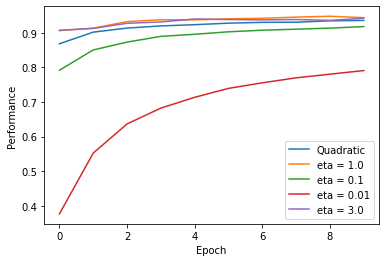

In [9]:
fig, ax = plt.subplots()
ax.plot(progress, label='Quadratic')
ax.plot(progressCE1, label='eta = 1.0')
ax.plot(progressCE2, label='eta = 0.1')
ax.plot(progressCE3, label='eta = 0.01')
ax.plot(progressCE4, label='eta = 3.0')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

It seems as though the cross-entropy enables a little better training, but it is hard to say. It varies quite a bit, probably based on the weight initialisation.

# Softmax activation in final layer

In [33]:
net = nn.NN() # using quadratic cost and sigmoids
net.set_layers([784, 30, 10])
net.init_weights_and_biases()
progress = net.SGD(training_data, 30, 10, 3.0, test_data)
net.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9387

Experimentation showed that learning rate of 3 is good also for softmax output layer.

In [34]:
netsoftmax = nn.NN()
netsoftmax.set_final_activation(nn.Softmax)
netsoftmax.set_layers([784, 30, 10])
netsoftmax.init_weights_and_biases()
progresssoftmax = netsoftmax.SGD(training_data, 30, 10, 3.0, test_data)
netsoftmax.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9260

In [28]:
net_soft_ce = nn.NN()
net_soft_ce.set_cost(nn.CrossEntropyCost)
net_soft_ce.set_final_activation(nn.Softmax)
net_soft_ce.set_layers([784, 30, 10])
net_soft_ce.init_weights_and_biases()
progress_soft_ce = net_soft_ce.SGD(training_data, 30, 10, 3.0, test_data)
net_soft_ce.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9440

In [29]:
net_sig_ce = nn.NN()
net_sig_ce.set_cost(nn.CrossEntropyCost)
net_sig_ce.set_layers([784, 30, 10])
net_sig_ce.init_weights_and_biases()
progress_sig_ce = net_sig_ce.SGD(training_data, 30, 10, 3.0, test_data)
net_sig_ce.evaluate(test_data)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9


9469

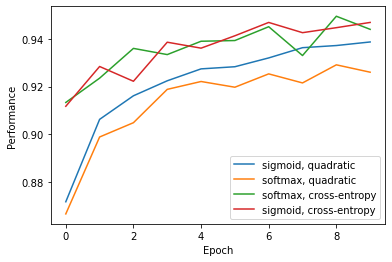

In [35]:
fig, ax = plt.subplots()
ax.plot(progress, label='sigmoid, quadratic')
ax.plot(progresssoftmax, label='softmax, quadratic')
ax.plot(progress_soft_ce, label='softmax, cross-entropy')
ax.plot(progress_sig_ce, label='sigmoid, cross-entropy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Performance')
ax.legend()
plt.show()

# Early Stopping

To limit overfitting, we can monitor accuracy and cost on both the training data and the test data to see how many epochs we should train for.

In [4]:
net = nn.NN()
net.set_layers([784, 30, 10])
net.init_weights_and_biases()
eval_cost, eval_acc, train_cost, train_acc = net.SGD(training_data, 30, 30, 3.0, 
                                                     test_data, True, True, True, True)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29


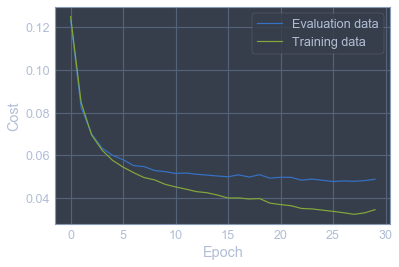

In [5]:
fig, ax = plt.subplots()
ax.plot(eval_cost, label='Evaluation data')
ax.plot(train_cost, label='Training data')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost')
ax.legend()
plt.show()

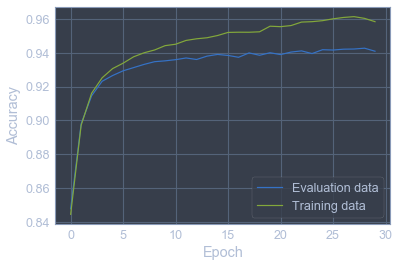

In [6]:
fig, ax = plt.subplots()
ax.plot(eval_acc, label='Evaluation data')
ax.plot(train_acc, label='Training data')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

We can conclude from this that there is some overfitting occuring quite early on, when the two curves depart from each other.